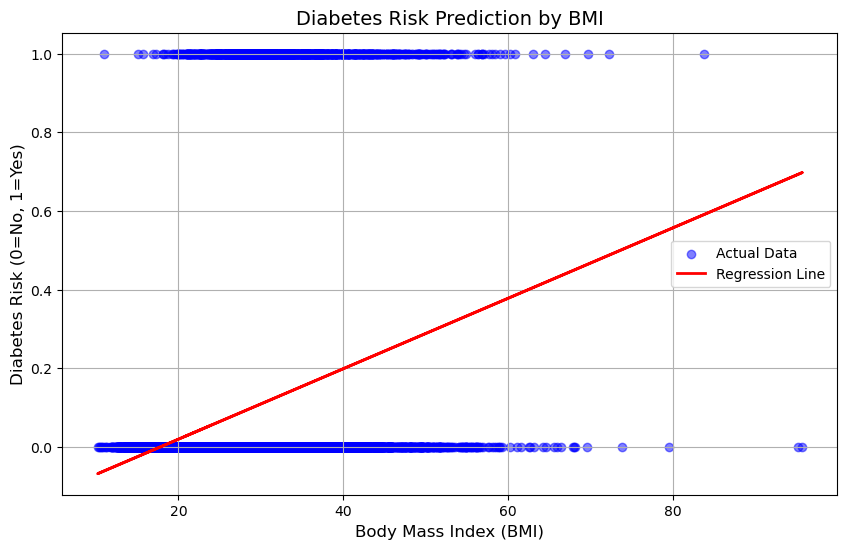

=== Linear Regression Results ===
Coefficient (BMI): 0.0090
Intercept: -0.1600
Mean Squared Error: 0.0743
R-squared: 0.0488

Interpretation:
Each unit increase in BMI increases diabetes risk by 0.0090 units


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Data cleaning - remove rows with missing values if any
df = df.dropna()

# Prepare data - using BMI as predictor
X = df[['bmi']].values  # Using BMI as predictor
y = df['diabetes'].values  # Diabetes as target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Diabetes Risk Prediction by BMI', fontsize=14)
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Diabetes Risk (0=No, 1=Yes)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("=== Linear Regression Results ===")
print(f"Coefficient (BMI): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("\nInterpretation:")
print(f"Each unit increase in BMI increases diabetes risk by {model.coef_[0]:.4f} units")

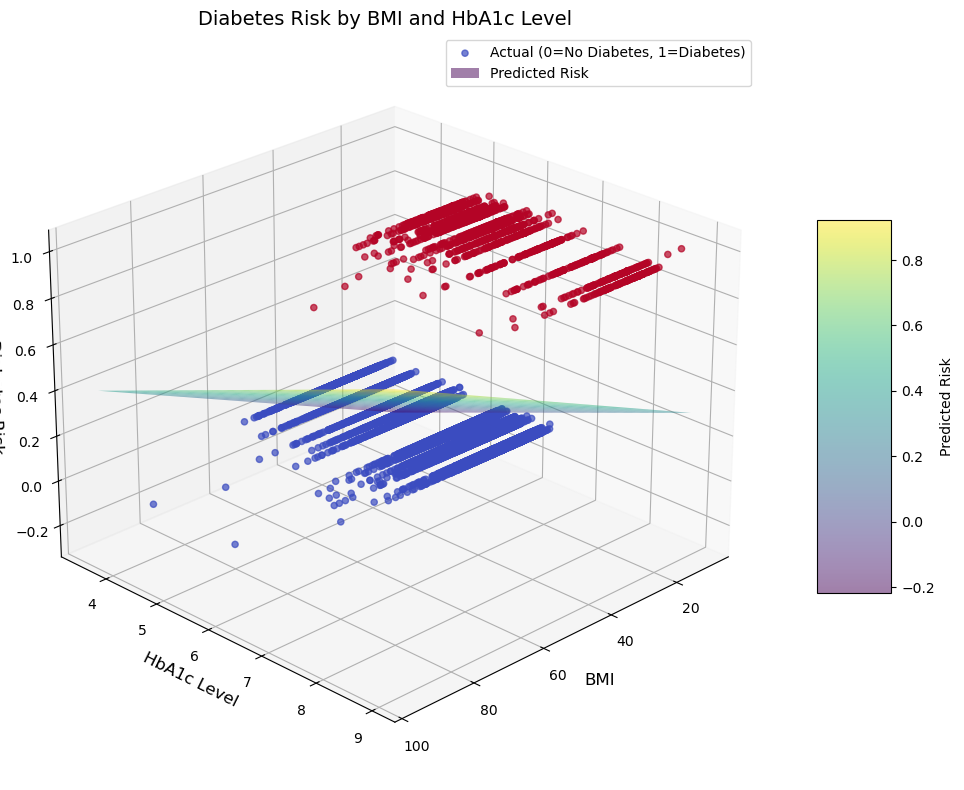

=== Multiple Linear Regression Results ===
Coefficients: [BMI: 0.0076, HbA1c: 0.1007]
Intercept: -0.6792
Mean Squared Error: 0.0631
R-squared: 0.1924

Interpretation:
Positive coefficients indicate increased diabetes risk


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Data cleaning
df = df.dropna()

# Prepare data - using BMI and HbA1c as predictors
X = df[['bmi', 'HbA1c_level']].values
y = df['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create meshgrid for 3D plot
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 20)
hba1c_range = np.linspace(df['HbA1c_level'].min(), df['HbA1c_level'].max(), 20)
Bmi, HbA1c = np.meshgrid(bmi_range, hba1c_range)
Z = model.predict(np.c_[Bmi.ravel(), HbA1c.ravel()]).reshape(Bmi.shape)

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, 
           c=y_test, cmap='coolwarm', alpha=0.7,
           label='Actual (0=No Diabetes, 1=Diabetes)')

# Plot prediction surface
surf = ax.plot_surface(Bmi, HbA1c, Z, 
                      alpha=0.5, cmap='viridis',
                      label='Predicted Risk')

# Customize view
ax.view_init(elev=25, azim=45)
ax.set_xlabel('BMI', fontsize=12)
ax.set_ylabel('HbA1c Level', fontsize=12)
ax.set_zlabel('Diabetes Risk', fontsize=12)
ax.set_title('Diabetes Risk by BMI and HbA1c Level', fontsize=14)

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5, label='Predicted Risk')
plt.legend()
plt.tight_layout()
plt.show()

# Print results
print("=== Multiple Linear Regression Results ===")
print(f"Coefficients: [BMI: {model.coef_[0]:.4f}, HbA1c: {model.coef_[1]:.4f}]")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("\nInterpretation:")
print("Positive coefficients indicate increased diabetes risk")

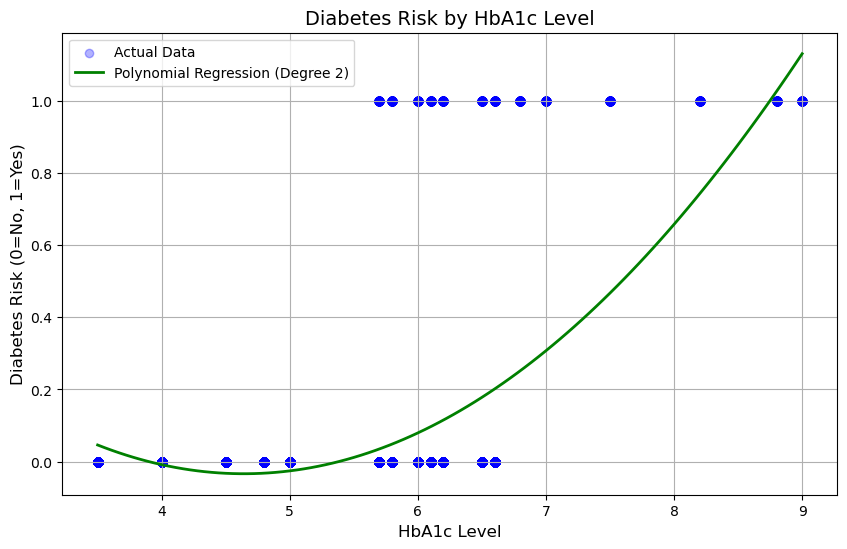

=== Polynomial Regression Results ===
Coefficients: [ 0.         -0.56797485  0.06119515]
Intercept: 1.2846
Mean Squared Error: 0.0551
R-squared: 0.2940

Note: The polynomial terms capture non-linear relationships between HbA1c and diabetes risk


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Data cleaning
df = df.dropna()

# Prepare data - using HbA1c as predictor
X = df[['HbA1c_level']].values
y = df['diabetes'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial regression model (degree 2)
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create points for smooth curve
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.3, label='Actual Data')
plt.plot(x_range, y_range, color='green', linewidth=2, 
         label='Polynomial Regression (Degree 2)')
plt.title('Diabetes Risk by HbA1c Level', fontsize=14)
plt.xlabel('HbA1c Level', fontsize=12)
plt.ylabel('Diabetes Risk (0=No, 1=Yes)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("=== Polynomial Regression Results ===")
print(f"Coefficients: {model.named_steps['linear'].coef_}")
print(f"Intercept: {model.named_steps['linear'].intercept_:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("\nNote: The polynomial terms capture non-linear relationships between HbA1c and diabetes risk")